In [190]:
# importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

In [174]:
FILEPATHS = { # For october only
    'comissionados_nao_quadro':'comissionados_nao_quadro_out.xls',
    'comissionados_quadro':'comissionados_quadro_out.xls',
    'folha_pgto':'folha_pgto_out.xls',
    'media_salario':'media_salario_out.xls',
    'servants': 'servidores_out.xls'
}
def get_filepath(key):
    return FILEPATHS[key]

In [175]:
# reading files
servidores = pd.read_excel('../data/{}'.format(get_file('servants'))).dropna()
comissionados_nao_quadro = pd.read_excel('../data/{}'.format(get_file('comissionados_nao_quadro'))).dropna()
comissionados_quadro = pd.read_excel('../data/{}'.format(get_file('comissionados_quadro'))).dropna()

In [176]:
comissionados_nao_quadro.shape

(196, 6)

In [31]:
comissionados_quadro.head()

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual
1,SEFIN,DEATRI,08.061-4,DINA ELIZABETH EVANGELISTA SANTOS,AUDITOR FISCAL DE TRIBUTOS MUNICIPAIS,R,R,COORDENADOR II
2,SMS,SMS,12.040-2,VALTER MAKOTO NAKAGAWA,MEDICO,S,S,SECRETARIO ADJUNTO
3,OTC,OTC,14.425-3,RIVALDO SANTOS DE ALMEIDA JUNIOR,TEC.DE ABASTECIMENTO,L,CS,OUVIDOR PUBLICO MUNICIPAL
4,SESEG,CORREGE-SESEG,15.068-0,RAIMUNDO DOS SANTOS FERREIRA,GUARDA MUNICIPAL IV-INSPETOR CHEFE,L,C-1,CHEFE DE DEPARTAMENTO
5,SESEG,DGM,15.193-6,FRANCISCO APARECIDO JERONIMO,GUARDA MUNICIPAL III-INSPETOR,J,J,COORDENADOR III


In [24]:
servidores['Tipo de Servidor'].unique()

array(['Estatutário', 'Cargo em Comissão não Pertencente ao Quadro',
       'Celetista'], dtype=object)

In [40]:
servidores.head()

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.
1,ABDON FERREIRA DA SILVA NETO,32.642-1,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDUC - UME-NGF,20/05/2013,1
2,ABIGAIL DE ALMEIDA ELIAS,28.796-1,Estatutário,PROF. ADJUNTO I,PROF. ADJUNTO I,105.0,SEDUC - UME-PA,16/10/2009,1
3,ABNER DE SOUZA SANTANA,36.136-0,Estatutário,INSTRUTOR DE ED. MUSICAL,INSTRUTOR DE ED. MUSICAL,200.0,SECULT - COFORM-SECULT,24/04/2018,1
4,ABNER NUNES,31.636-4,Estatutário,OFICIAL DE ADMINISTRACAO,OFICIAL DE ADMINISTRACAO,200.0,SMS - SEUB-ACP,30/10/2012,1
5,ABRAAO COSME SAMPAIO,15.879-0,Estatutário,FISCAL DE TRANSITO,FISCAL DE TRANSITO,200.0,SEFIN - SEFIS-FEI,18/12/1987,1


In [39]:
servidores.columns

Index(['Nome do Servidor', 'Registro', 'Tipo de Servidor', 'Cargo Efetivo',
       'Cargo', 'Carga Horária', 'Lotação', 'Admissão', 'Qtde.'],
      dtype='object')

In [177]:
servidores['Tipo de Servidor'].value_counts()

Estatutário                                    11410
Cargo em Comissão não Pertencente ao Quadro      196
Celetista                                         98
Name: Tipo de Servidor, dtype: int64

In [178]:
nao_quadro_percentage = len(servidores[\
    servidores['Tipo de Servidor']=='Cargo em Comissão não Pertencente ao Quadro'])\
    /len(servidores)

In [179]:
print ('KPI1 : {:.2f}% of servants comissionados over all servantes'.format(100.*nao_quadro_percentage))

KPI1 : 1.67% of servants comissionados over all servantes


In [188]:
# Breakdown by dept
grouped = servidores[servidores['Tipo de Servidor']=='Cargo em Comissão não Pertencente ao Quadro'].groupby(['Lotação'],
                                                                                                 as_index=False).\
agg({'Registro':'count'}).sort_values(by='Registro',ascending=False)

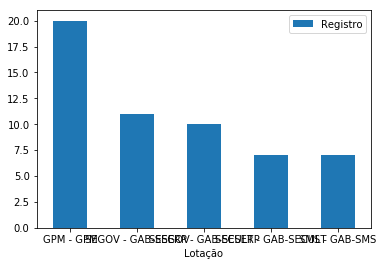

In [197]:
grouped[:5].plot.bar(x='Lotação', y='Registro', rot=0)

TypeError: show() got an unexpected keyword argument 'figsize'

### KPI 2 - Mayor

In [45]:
prefeito = servidores[servidores['Cargo Efetivo'].str.contains('PREFEITO MUNICIPAL')].iloc[0]['Nome do Servidor']

In [46]:
prefeito

'PAULO ALEXANDRE PEREIRA BARBOSA'

In [54]:
surnames_mayor = ['PEREIRA','BARBOSA']

In [69]:
# Comissionados fora quadro with same last name (any) as mayor
nao_quadro_same_surname = comissionados_nao_quadro[comissionados_nao_quadro.Nome.str.contains('|'.join(surnames_mayor))]
print (nao_quadro_same_surname.shape)
nao_quadro_same_surname.head()

(6, 6)


,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Salarial
28,SECOM,SECOM,36.742-5,CAMILLA PEREIRA COSTA,ASSESSOR TECNICO III,C-3
73,SESERP,DESERP,34.475-4,FLAVIO ANIBAL PEREIRA MORGADO,COORDENADOR II,C-2
128,SECULT,DECITEC,35.051-2,MICHEL AUGUSTO PEREIRA,COORDENADOR III,C-3
140,GPM,GPM,34.954-8,PAULO ALEXANDRE PEREIRA BARBOSA,PREFEITO MUNICIPAL,PREF
168,SEGOV,SEGOV,31.849-3,ROGERIO PEREIRA DOS SANTOS,SECRETARIO MUNICIPAL,CS


In [77]:
print ('KPI 2: {0} servants with same last name as mayor - {1}'.format(len(nao_quadro_same_surname),
       str(surnames_mayor)))

KPI 2: 6 servants with same last name as mayor - ['PEREIRA', 'BARBOSA']


### KPI3 - same surname as secretary of his/her department

In [88]:
secreatarios = servidores[servidores['Cargo'].str.contains('SECRETARIO MUNICIPAL')]

In [91]:
secreatarios.head(20)

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.
1254,ANGELO JOSE DA COSTA FILHO,31.854-3,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SIEDI - GAB-SIEDI,01/01/2013,1
1736,CARLOS ALBERTO FERREIRA MOTA,31.884-0,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEDS - GAB-SEDS,03/01/2013,1
1835,CARLOS TEIXEIRA FILHO,34.947-2,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEGES - GAB-SEGES,02/01/2017,1
2448,CRISTINA ABREU DA ROCHA BARLETTA,20.853-8,Estatutário,PROF. ED. BASICA II,SECRETARIO MUNICIPAL,200.0,SEDUC - GAB-SEDUC,14/02/1995,1
3736,FABIANA RAMOS GARCIA PIRES,29.019-7,Estatutário,ENGENHEIRO,SECRETARIO MUNICIPAL,200.0,SESERP - GAB-SESERP,15/03/2010,1
3762,FABIO ALEXANDRE FERNANDES FERRAZ,31.852-7,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SMS - GAB-SMS,01/01/2013,1
4120,FLAVIO RAMIREZ JORDAO,34.951-4,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SECOM - GAB-SECOM,01/01/2017,1
4240,GELASIO AYRES FERNANDES JUNIOR,36.592-4,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEMES - GAB-SEMES,03/01/2019,1
5600,JULIO EDUARDO DOS SANTOS,34.949-8,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEDURB - GAB-SEDURB,01/01/2017,1
7098,MARCOS OLIVEIRA LIBORIO,34.950-6,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO MUNICIPAL,SECRETARIO MUNICIPAL,200.0,SEMAM - GAB-SEMAM,01/01/2017,1


In [99]:
servs_secretario = servidores.merge(secreatarios[['Lotação','Nome do Servidor']], on='Lotação')

In [157]:
# removed own entries of secretary (secretaries also exist in df servants)
servs_secretario_clean = servs_secretario[~servs_secretario.Registro.isin(secreatarios.Registro.unique())]
servs_secretario_clean = servs_secretario_clean.rename(columns={'Nome do Servidor_y':'secretario'})
servs_secretario_clean = servs_secretario_clean.rename(columns={'Nome do Servidor_x':'servidor'})

In [167]:
def extract_surnames(surname):
    forbidden_last_names = ['DA','DE','DOS']
    return [i for i in str(surname).split(' ')[1:] if i not in forbidden_last_names]
    

suspected_servents_secretary = servs_secretario_clean[servs_secretario_clean.\
                       apply(lambda x: any(name in x['servidor'] for name in extract_surnames(x['secretario'])),\
                             axis=1)]

In [168]:
suspected_servents_secretary['Lotação'].value_counts()

SEGOV - GAB-SEGOV      3
SEDS - GAB-SEDS        2
SAPIC - GAB-SAPIC      2
SEGES - GAB-SEGES      2
SESERP - GAB-SESERP    1
SETUR - GAB-SETUR      1
SEMAM - GAB-SEMAM      1
SEDUC - GAB-SEDUC      1
SESEG - GAB-SESEG      1
SEDURB - GAB-SEDURB    1
SMS - GAB-SMS          1
Name: Lotação, dtype: int64

In [173]:
print ('KPI3 : {} suspect servants with same name as secretary'.format(len(suspected_servents_secretary)))
suspected_servents_secretary.head(20)

KPI3 : 16 suspect servants with same name as secretary


,servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.,secretario
2,EDUARDO ROCHA DE CASTRO,31.523-4,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDURB - GAB-SEDURB,10/10/2012,1,JULIO EDUARDO DOS SANTOS
13,ADELARIO MARTINS DOS REIS FILHO,24.412-9,Estatutário,MOTORISTA,MOTORISTA,200.0,SEGES - GAB-SEGES,26/12/2002,1,CARLOS TEIXEIRA FILHO
46,JUAN MANUEL VILLARNOBO FILHO,34.183-4,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO ADJUNTO,SECRETARIO ADJUNTO,200.0,SEGES - GAB-SEGES,06/05/2015,1,CARLOS TEIXEIRA FILHO
75,CAMILLA CARDOSO,28.154-3,Estatutário,OFICIAL DE ADMINISTRACAO,OFICIAL DE ADMINISTRACAO,200.0,SAPIC - GAB-SAPIC,02/09/2008,1,SANDOVAL DO NASCIMENTO SOARES
77,MARIA JOSE FIGUEIREDO XAVIER DE OLIVEIRA,36.642-7,Cargo em Comissão não Pertencente ao Quadro,ASSESSOR TECNICO III,ASSESSOR TECNICO III,200.0,SAPIC - GAB-SAPIC,26/02/2019,1,SANDOVAL DO NASCIMENTO SOARES
108,GUALBERTO GRACINDO GONCALVES JUNIOR,31.549-9,Estatutário,ASSISTENTE SOCIAL,ASSISTENTE SOCIAL,150.0,SEDS - GAB-SEDS,17/10/2012,1,CARLOS ALBERTO FERREIRA MOTA
111,LUCAS FERNANDES ALBERTO,34.554-6,Estatutário,OPERADOR SOCIAL,OPERADOR SOCIAL,200.0,SEDS - GAB-SEDS,16/08/2016,1,CARLOS ALBERTO FERREIRA MOTA
146,ANTONIO RAMOS DO NASCIMENTO,35.638-6,Cargo em Comissão não Pertencente ao Quadro,ASSESSOR TECNICO III,ASSESSOR TECNICO III,200.0,SESERP - GAB-SESERP,10/10/2017,1,FABIANA RAMOS GARCIA PIRES
174,FLAVIO DE BRITO JUNIOR,32.040-8,Cargo em Comissão não Pertencente ao Quadro,SECRETARIO ADJUNTO,SECRETARIO ADJUNTO,200.0,SESEG - GAB-SESEG,15/01/2013,1,SERGIO DEL BEL JUNIOR
202,CECILIO ANTONIO DA ROCHA MELO,25.828-5,Estatutário,PROF. ED. BASICA II,PROF. ED. BASICA II,180.0,SEDUC - GAB-SEDUC,10/11/2006,1,CRISTINA ABREU DA ROCHA BARLETTA
